In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
import rasterio

### Mask out of range

In [ ]:
#Finding the images with mask not placed on the data 

import os
import rasterio
import numpy as np

count = 0
test_path = './dataset/test_img'
img_list = os.listdir(test_path)
mask_fix_list=[]

for img_name in img_list:
    img_file = os.path.join(test_path, img_name)
    img = rasterio.open(img_file).read().transpose(1, 2, 0)
    img_zero_count = np.count_nonzero(img[:, :, -1] == 0)
    if img_zero_count>1000:
        print("Image pixels incomplete: ", img_name)
        print("# of pixels ==0: ", img_zero_count)
        count+=1

print("Total test sample incomplete: ", count)

In [ ]:
# Plotting the sample
import os
import rasterio
import numpy as np
import pandas as pd
import os

test_path = './dataset/test_img'
img_list = os.listdir(test_path)
print("# of test data: ", len(img_list))

index=1984
single_data_path= f'./dataset/test_img/test_img_{index}.tif'
img = rasterio.open(single_data_path).read().transpose(1, 2, 0)
img_8 = img/(2**16)
fig,axs = plt.subplots(2,5)
fig.set_figheight(8)
fig.set_figwidth(15)
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(img_8[:,:,i*5+j])

In [ ]:
#Make exclusion list: Exclude masks that are out of range 

import os
import rasterio
import numpy as np
import pandas as pd

count = 0
img_path = './dataset/train_img'
mask_path = './dataset/train_mask'
img_list = os.listdir(img_path)
mask_fix_list=[]


for img_name in img_list:
    img_file = os.path.join(img_path, img_name)
    mask_name = img_name.replace('img', 'mask')
    mask_file = os.path.join(mask_path, mask_name)
    
    mask = rasterio.open(mask_file).read().transpose(1, 2, 0)
    img = rasterio.open(img_file).read().transpose(1, 2, 0)
    
    m = np.ma.masked_where(img[:, :, -2] != 0, mask[:, :, 0])
    new_mask = np.where(m.data, m.mask, 0)
    
    mask_zero_count = np.count_nonzero(mask[:, :, 0] == 0)
    new_zero_count = np.count_nonzero(new_mask == 0)
    
    if mask_zero_count != new_zero_count:
        print(img_name)
        mask_fix_list.append(img_name)
        count += 1
print(count)

train_exclude_path='./dataset/train_exclude_list.csv'
train_exclude_df = pd.DataFrame({'train_exclude_cases': mask_fix_list})
train_exclude_df.to_csv(train_exclude_path, index=False)
print(f'Data has been written to {train_exclude_path}')

In [5]:
# Check how many cases are excluded
case_dataframe = pd.read_csv(train_exclude_path)
case_names=case_dataframe['train_exclude_cases']
len(case_names)

NameError: name 'train_exclude_path' is not defined

### Analyzing the train/test dataset

In [2]:
train_imgs = glob('./dataset/train_img/*.tif')
test_imgs = glob('./dataset/test_img/*.tif')
train_masks = glob('./dataset/train_mask/*.tif')

In [3]:
import pandas as pd
pd.read_csv('./train_meta_3.csv').shape

(32398, 2)

In [ ]:
data = rasterio.open(train_imgs[20])
data.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 256, 'height': 256, 'count': 10, 'crs': CRS.from_epsg(32635), 'transform': Affine(30.0, 0.0, 464385.0,
       0.0, -30.0, -3541005.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

In [ ]:
data.bounds

BoundingBox(left=464385.0, bottom=-3548685.0, right=472065.0, top=-3541005.0)

In [ ]:
data.lnglat()

(26.663454750705686, -32.03933318033548)

In [ ]:
data.res

(30.0, 30.0)

### channel by channel

In [ ]:
img_num = 60

In [ ]:
img = rasterio.open(train_imgs[img_num]).read().transpose(1,2,0)
img_8 = img/(2**16)

fig,axs = plt.subplots(2,5)
fig.set_figheight(8)
fig.set_figwidth(15)
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(img_8[:,:,i*5+j])

In [ ]:
for i in range(10):
    train_imgs = f'./data/image/train_img/train_img_{i}.tif'
    train_masks = f'./data/image/train_mask/train_mask_{i}.tif'
    
    mask = rasterio.open(train_masks).read().transpose(1,2,0)
    img = rasterio.open(train_imgs).read().transpose(1,2,0)
    # img = img/(2**16)    
    print(img[:,:,6].shape)
    normalized = normalize(img[:,:,6])
    print(np.ma.compressed(np.ma.masked_where(mask[:,:,0]==0, normalized)).min(),normalized.min())

(256, 256)
0.12740529502337086 0.02952638948221076
(256, 256)
0.09953683888807802 0.02602457150682534
(256, 256)
0.23868697840802175 0.02287353812958212
(256, 256)
0.13566625729359455 0.020037517641954775
(256, 256)
0.24886138378827835 0.041878686286696123
(256, 256)
0.08357579529111099 0.03629945456821561
(256, 256)
0.31756664153445235 0.04327609027911214
(256, 256)
0.14327199388031558 0.03010174336144218
(256, 256)
0.11462162501012915 0.03135034327106376
(256, 256)
0.26075240032604047 0.04306319640619571


(256, 256)
(256, 256, 1)


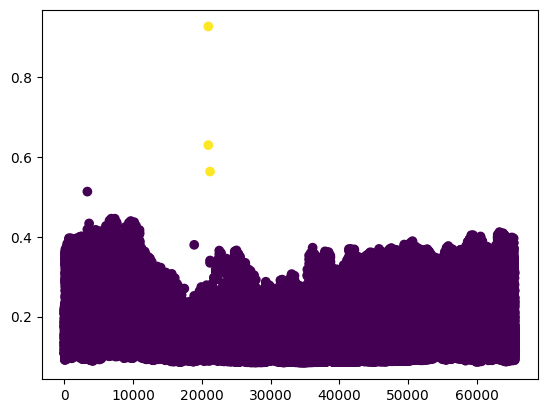

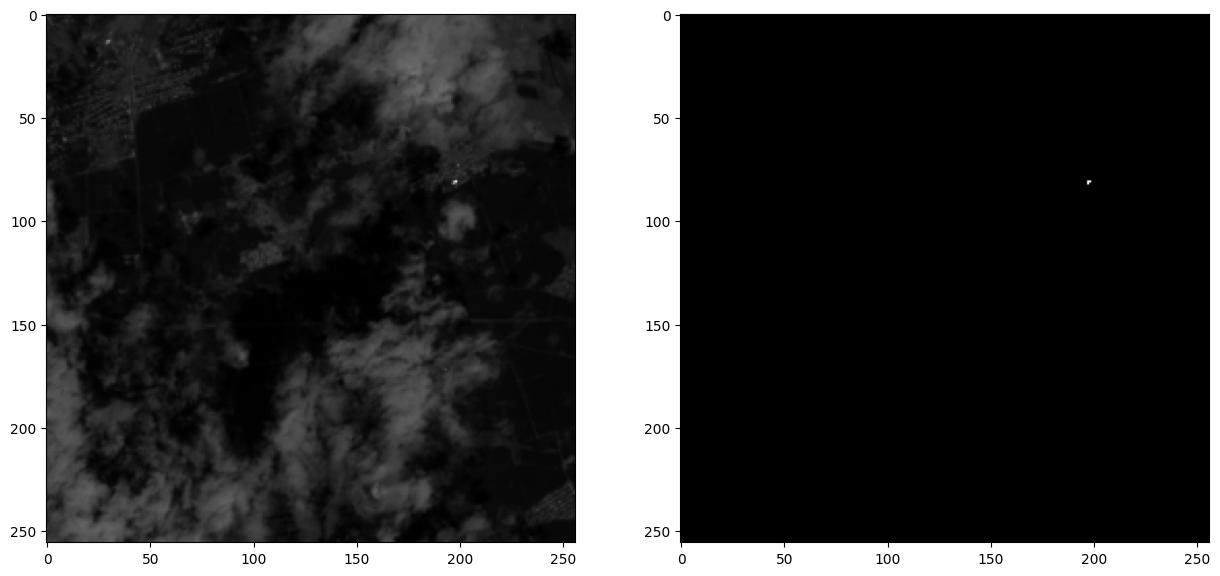

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
import rasterio
import albumentations as A


img_num = 2
channel_num=6
train_imgs = f'./data/image/train_img/train_img_{img_num}.tif'
train_masks = f'./data/image/train_mask/train_mask_{img_num}.tif'

mask = rasterio.open(train_masks).read().transpose(1,2,0)
mask = mask/(2**16)
img = rasterio.open(train_imgs).read().transpose(1,2,0)
img = img/(2**16)
print(img[:,:,channel_num].shape)
print(mask.shape)

# nor = A.Normalize((0.5, ), (0.5, ))
# augmented = nor(image=img[:,:,channel_num], mask=mask[:,:,0])

# mask = augmented['mask']
# img = augmented['image']
# print(mask.shape)
# print(img.shape)

plt.scatter(np.array(range(256*256)), np.array(img[:,:,channel_num]).flatten(), c = np.array(mask).flatten())

fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(img[:,:,channel_num],cmap='gray')
axs[1].imshow(mask,cmap='gray')
    

### Mask Analysis

In [ ]:
import albumentations as A
import matplotlib.pyplot as plt

mask = rasterio.open(train_masks[img_num]).read().transpose(1, 2, 0)

cr = A.CropNonEmptyMaskIfExists(height=256, width=256, ignore_values=None, ignore_channels=None, always_apply=False, p=1.0)
augmented = cr(image=img_8[:, :, 3], mask=mask)

mask = augmented['mask']
img_8 = augmented['image']

plt.imshow(mask)

In [ ]:
print(np.count_nonzero(mask[:,:,0]==0))
m=np.ma.masked_where(mask[:,:,0]==0, img_8[:,:,-2])
print(m.data)
print(m.mask)
print(np.ma.compressed(m))
#mask value 가 1인 경우에 대하여 이미지 값들 출력


m=np.ma.masked_where(img_8[:,:,-2]!=0, mask[:,:,0])
print(m.data.shape) #(256, 256)
print(m.mask.shape) #(256, 256)
new_mask= np.where(m.data, m.mask, 0)
#이미지값이 0인 곳에 대하여 마스크 값 출력 이후 이를 0으로 변경

print(new_mask)

print(np.count_nonzero(mask[:,:,0]==0))
print(np.count_nonzero(new_mask==0))



'''array= list(np.multiply(m.data, m.mask))
print(array)'''
'''x,y= mask[:,:,0].shape
for i in range(x):
    for j in range(y):
        if mask[:,:,0][i,j]==1 and img[:,:,-1][i,j]==0:
            mask[:,:,0][i,j]==0
'''
#cur_min=np.ma.compressed(m).min()

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
import rasterio
import albumentations as A
import os


img_num = 2
channel_num=6
train_imgs = f'./data/image/train_img/train_img_{img_num}.tif'
train_masks = f'./data/image/train_mask/train_mask_{img_num}.tif'
mask = rasterio.open(train_masks).read().transpose(1,2,0)
img = rasterio.open(train_imgs).read().transpose(1,2,0)

img_max=max(img[:,:,channel_num].flatten())
print("max for original image", img_max)


new_mask = np.where(mask[:,:,0], img[:,:,channel_num], 0)
new_mask_flat=new_mask.flatten()
new_zero_count = np.count_nonzero(new_mask != 0) #same as # of mask==1
print("new_zero_count:" , new_zero_count)
mask_max=max(new_mask_flat[new_mask_flat != 0])
print("max for pixel with mask", mask_max)
count=0
if img_max!=mask_max:
    print("case # for img_max!=mask_max",img_num)
    count+=1
print("# of img_max!=mask_max num: ", count)





# count = 0
# img_path = './dataset/train_img'
# mask_path = './dataset/train_mask'
# img_list = os.listdir(img_path)
# for img_name in img_list:
#     img_file = os.path.join(img_path, img_name)
#     mask_name = img_name.replace('img', 'mask')
#     mask_file = os.path.join(mask_path, mask_name)
    
#     mask = rasterio.open(mask_file).read().transpose(1, 2, 0)
#     img = rasterio.open(img_file).read().transpose(1, 2, 0)
    
#     m = np.ma.masked_where(mask[:, :, 0]==0,img[:,:,channel_num])
#     new_mask = np.where(m.data, m.mask, 0)
    
#     mask_zero_count = np.count_nonzero(mask[:, :, 0] == 0)
#     new_zero_count = np.count_nonzero(new_mask == 0)
    
#     if mask_zero_count != new_zero_count:
#         print(img_name)
#         count += 1

# print(count)



max for original image 60810
new_zero_count: 3
max for pixel with mask 60810


### image vs. mask plotting 

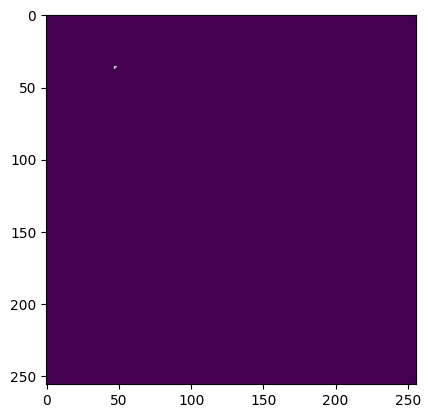

In [ ]:
mask = rasterio.open(train_masks[img_num]).read().transpose(1,2,0)
plt.imshow(mask)

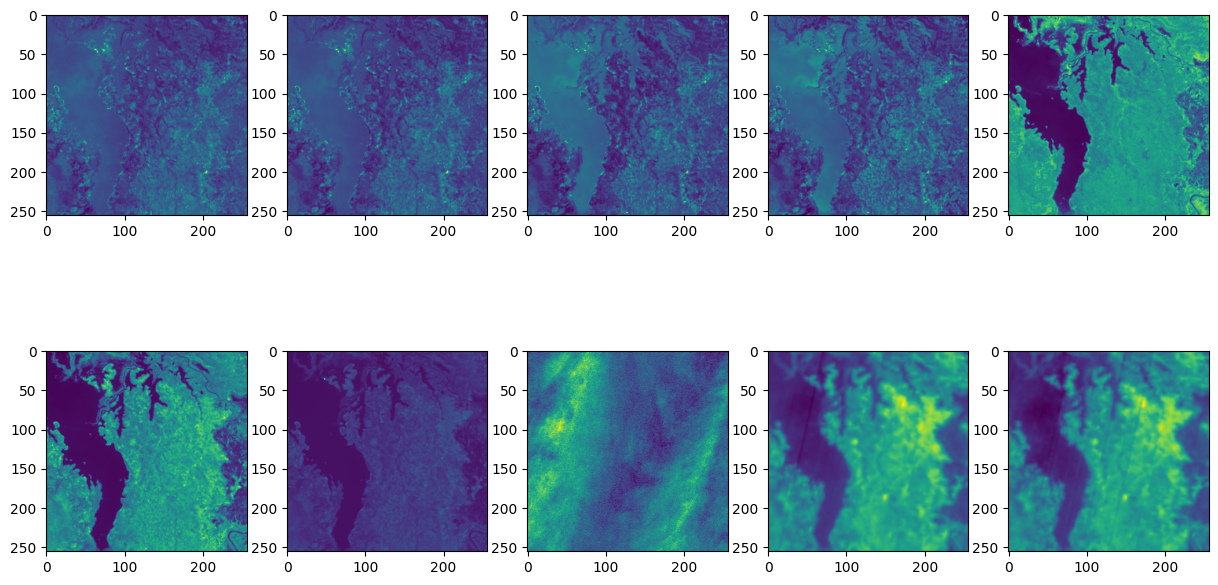

In [ ]:
img = rasterio.open(train_imgs[img_num]).read().transpose(1,2,0)
img_8 = img/(2**16)

fig,axs = plt.subplots(2,5)
fig.set_figheight(8)
fig.set_figwidth(15)
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(img_8[:,:,i*5+j])

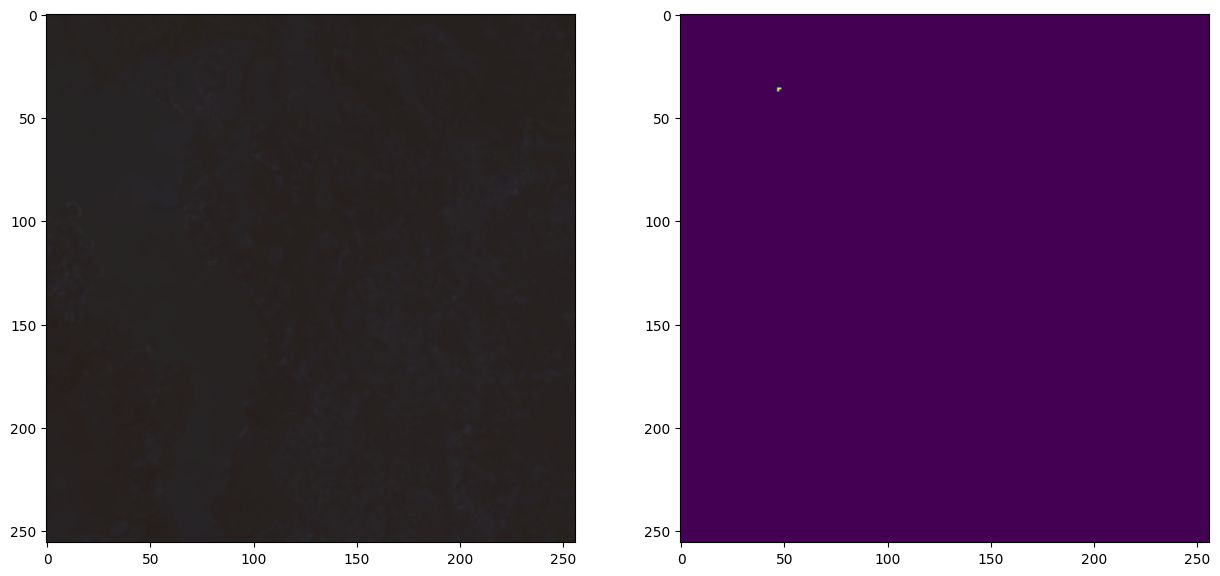

In [ ]:
#rgb
rgb = [0,2,3]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(img_8[:,:,rgb])
axs[1].imshow(mask)

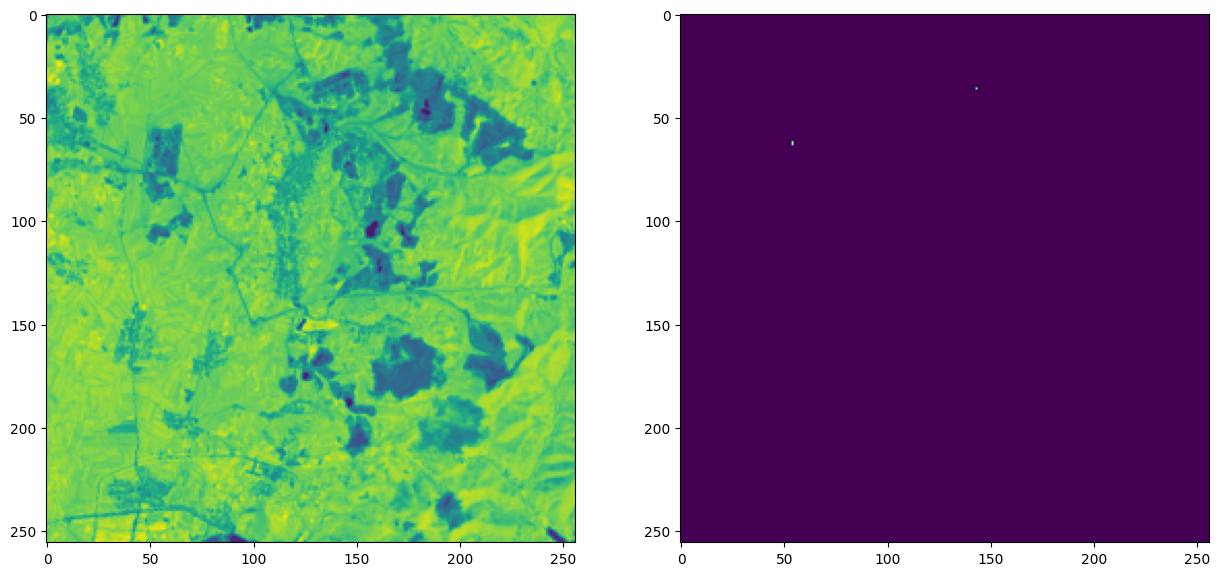

In [ ]:
# NDVI
NIR = img_8[:,:,4]
R = img_8[:,:,1]
NDVI = (NIR-R)/(NIR+R)
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(NDVI)
axs[1].imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


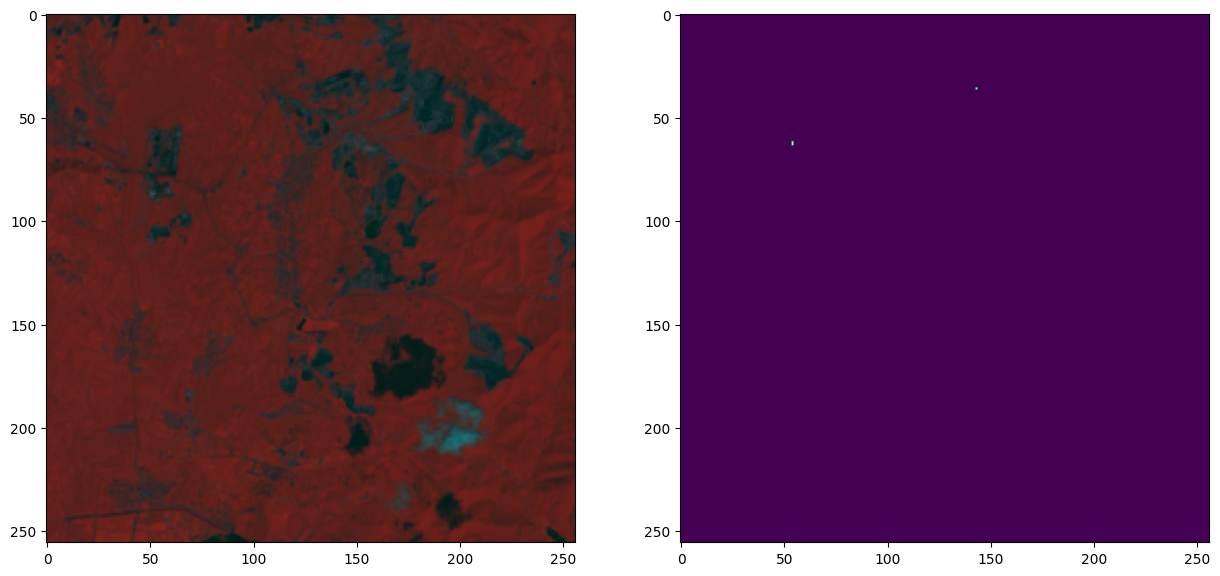

In [ ]:
# NDVI, G B
NIR = img_8[:,:,4]
R = img_8[:,:,1]
NDVI = (NIR-R)/(NIR+R)
G = img_8[:,:,2]
B = img_8[:,:,3]
ndvigb = np.stack([NDVI,G,B],axis=2)

fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(ndvigb)
axs[1].imshow(mask)

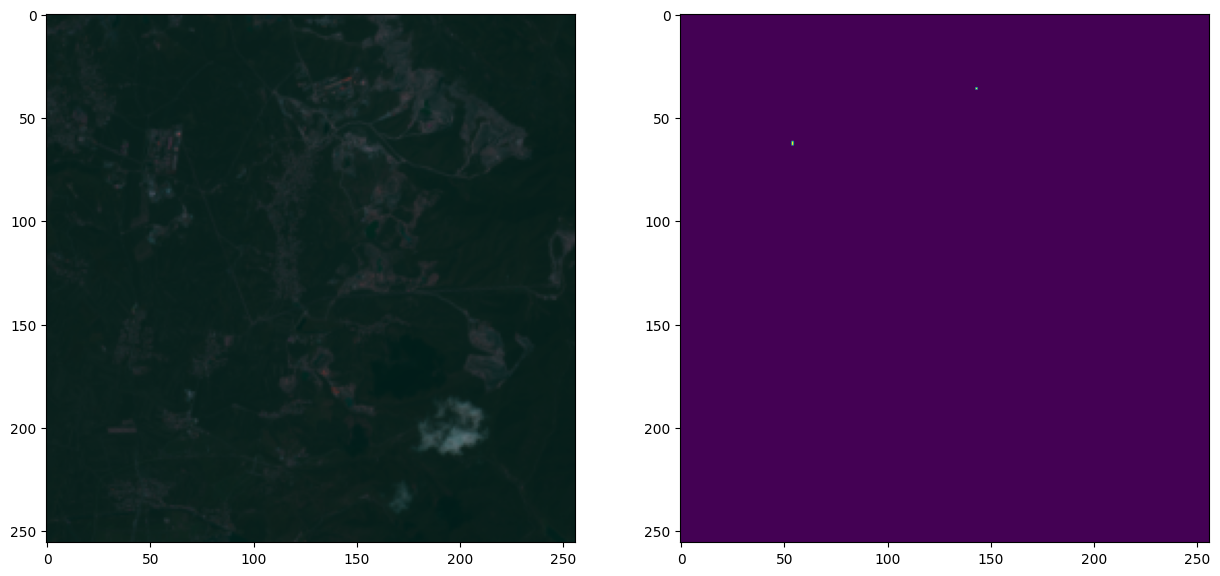

In [ ]:
# NDVI, SWIR1, B
agr=[4,5]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
c1 = (img_8[:,:,6]-img_8[:,:,7])
c2 = img_8[:,:,2]
c3 = img_8[:,:,3]

# c3 = np.zeros((256,256))
# c3 = NDVI

ndvigb = np.stack([c1,c2,c3],axis=2)
axs[0].imshow(ndvigb)
axs[1].imshow(mask)

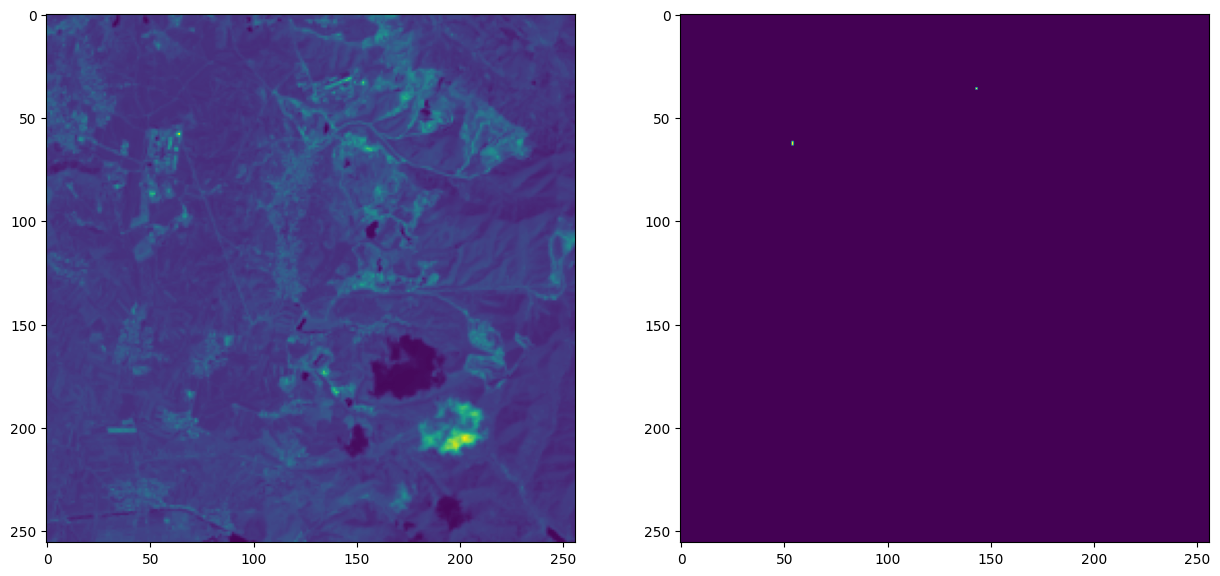

In [ ]:
# NDVI, SWIR1, B
agr=[4,5]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
c1 = (img_8[:,:,5]+img_8[:,:,6])

axs[0].imshow(c1)
axs[1].imshow(mask)

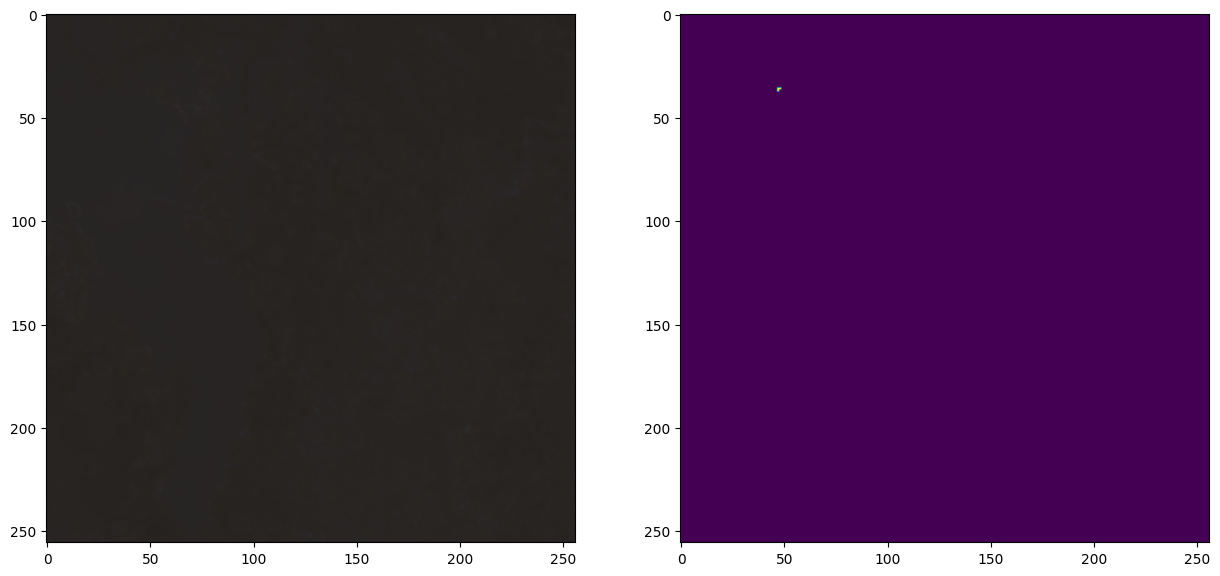

In [ ]:
agr=[0,1,2]
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)

axs[0].imshow(img_8[:,:,agr])
axs[1].imshow(mask)

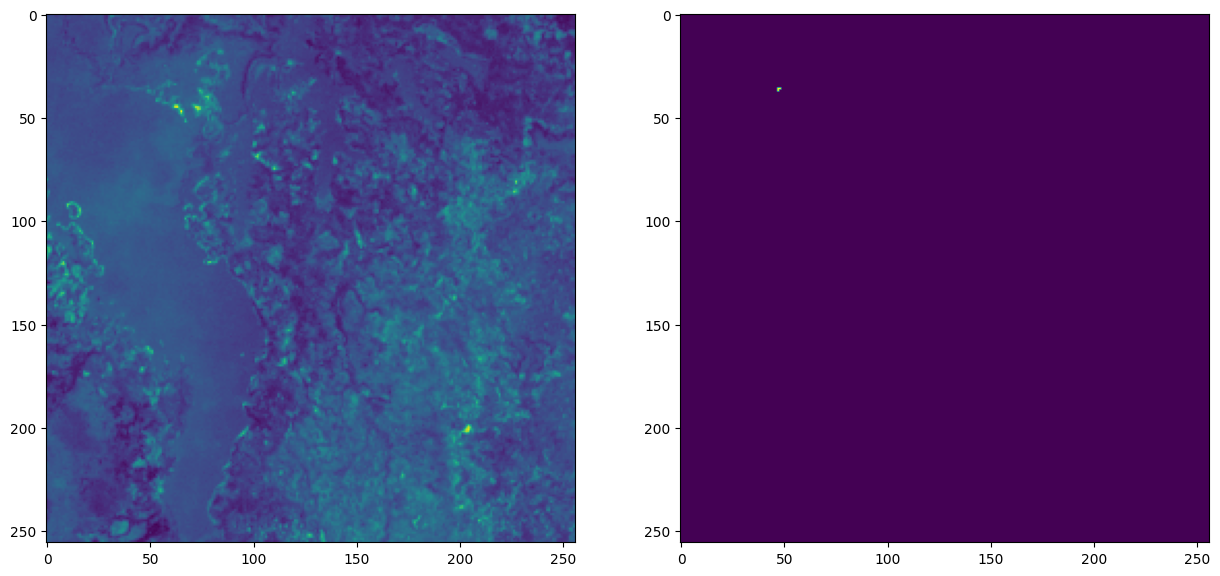

In [ ]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0].imshow(img_8[:,:,0])
axs[1].imshow(mask)